### 1. Generating Hypothetical Population

Let's assume that this is our population data, including the indenpent variable, X and the dependent variable, Y. 

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [223]:
np.random.seed(0)
X = np.random.normal(0, 5, 10000)
epsilon = np.random.normal(0, 1, 10000)

beta_0 = 100
beta_1 = 0.3

Y = beta_0 + beta_1*X + epsilon

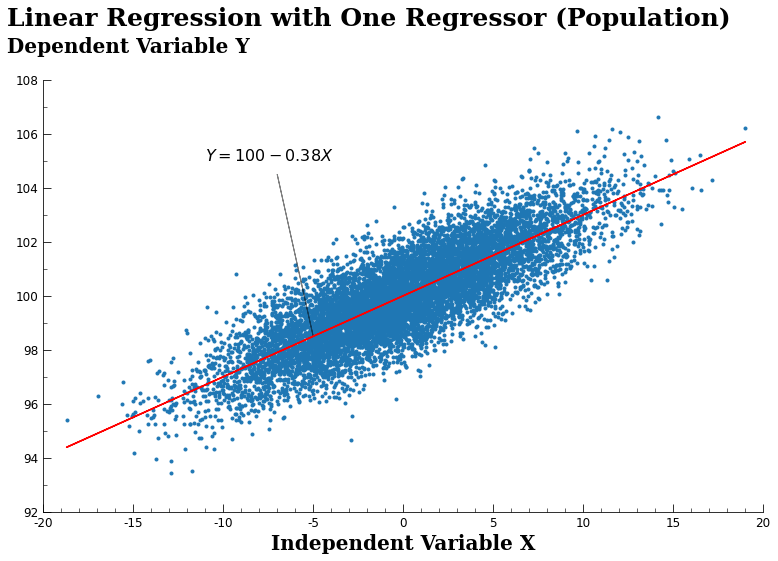

In [224]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(X, Y, marker=".")
ax.plot(X, beta_0 + beta_1*X, color="red")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(92, 108)
ax.set_xlim(-20, 20)

ax.set_xlabel("Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")
ax.text(-22,109,'Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax.text(-22,110,'Linear Regression with One Regressor (Population)', fontfamily='serif', fontsize=25, ma='center', fontweight='bold')

ax.arrow(-5, 98.5, -2, 6, alpha=0.5)
ax.text(-11, 105, r'$Y=100-0.38X$', fontsize=16)

plt.show()

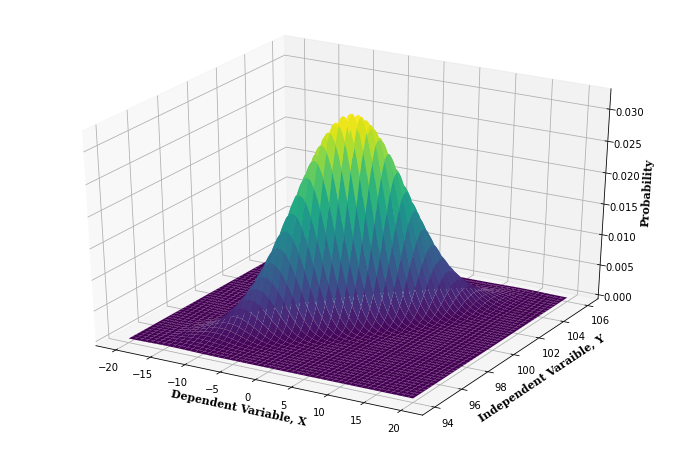

In [225]:
#Parameters to set
mu_x = np.mean(X)
variance_x = np.var(X)

mu_y = np.mean(Y)
variance_y = np.var(Y)

cov_xy = np.cov(X, Y)[0,1]

#Create grid and multivariate normal
x = np.linspace(-20,20,500)
#y = beta_0 + beta_1*x
y = np.linspace(94,106,500)
X_set, Y_set = np.meshgrid(x,y)
pos = np.empty(X_set.shape + (2,))
pos[:, :, 0] = X_set; pos[:, :, 1] = Y_set
rv = multivariate_normal([mu_x, mu_y], [[variance_x, cov_xy], [cov_xy, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X_set, Y_set, rv.pdf(pos), cmap='viridis',linewidth=0)
ax.set_xlabel('Dependent Variable, X', fontfamily='serif', fontsize=11, fontweight="bold")
ax.set_ylabel('Independent Varaible, Y', fontfamily='serif', fontsize=11, fontweight="bold")
ax.set_zlabel('Probability', fontfamily='serif', fontsize=11, fontweight="bold")
plt.show()

Ignore the values on each axis. This is just to show you how the 3D plot looks from the top.


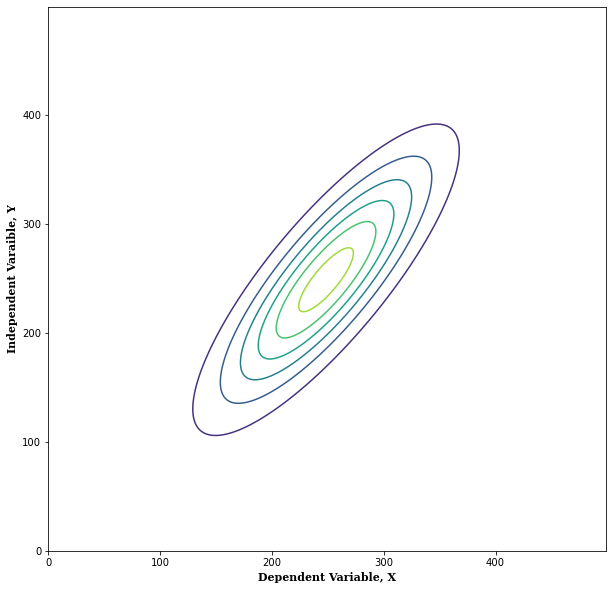

In [226]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(rv.pdf(pos).reshape(500,500))
ax0.set_xlabel('Dependent Variable, X', fontfamily='serif', fontsize=11, fontweight="bold")
ax0.set_ylabel('Independent Varaible, Y', fontfamily='serif', fontsize=11, fontweight="bold")

print("Ignore the values on each axis. This is just to show you how the 3D plot looks from the top.")
plt.show()

And the distribution of each looks like the following. 

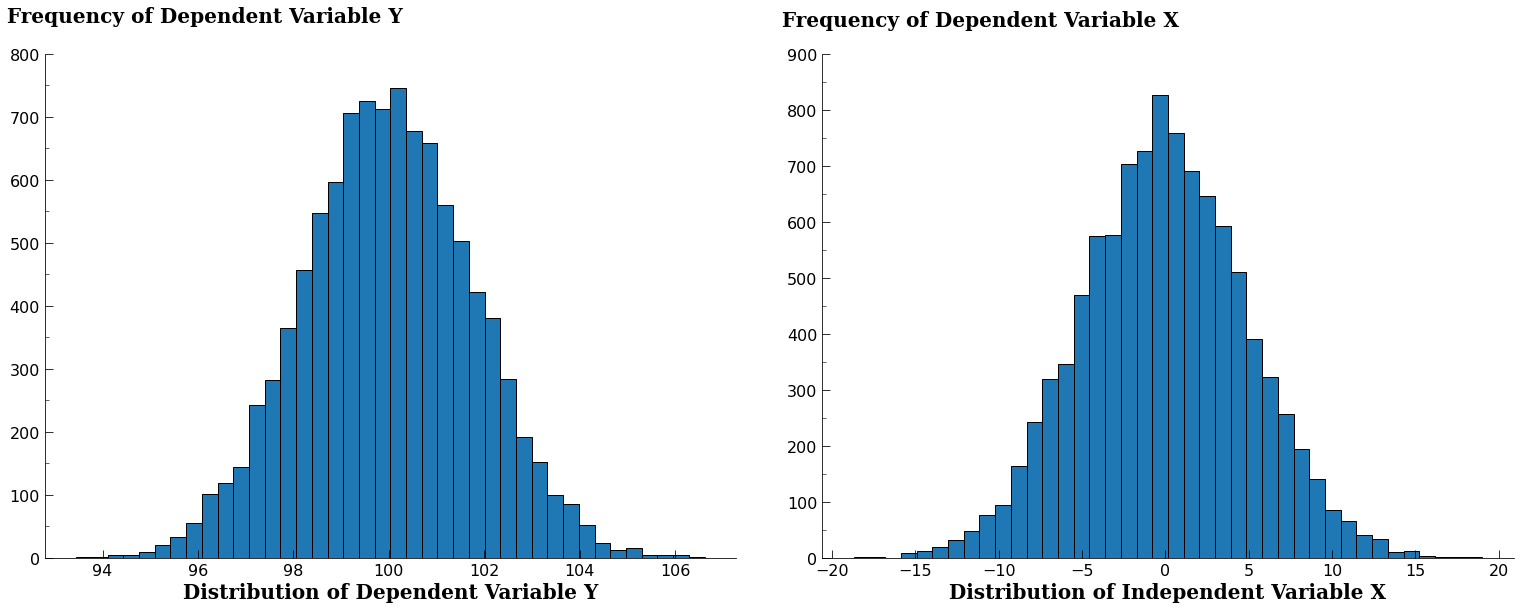

In [227]:
fig = plt.figure(figsize=(12,7))
ax2 = fig.add_axes([0, 1, 0.8, 1])
ax3 = fig.add_axes([0.9, 1, 0.8, 1])

ax2.hist(Y, bins=40, ec="black")
ax3.hist(X, bins=40, ec="black")

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax2.yaxis.set_major_locator(MultipleLocator(100))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2.yaxis.set_minor_locator(MultipleLocator(50))

ax3.yaxis.set_major_locator(MultipleLocator(100))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax3.yaxis.set_minor_locator(MultipleLocator(50))

ax2.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=16)
ax2.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)
ax2.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=16)

ax3.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=16)
ax3.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)
ax3.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=16)

ax2.set_ylim(0, 800)
ax3.set_ylim(0, 900)

ax2.set_xlabel("Distribution of Dependent Variable Y", fontfamily='serif', fontsize=20, fontweight="bold")
ax3.set_xlabel("Distribution of Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")

ax2.text(92,850,'Frequency of Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax3.text(-23,950,'Frequency of Dependent Variable X', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')

plt.show()

### 2. Taking a Sample from the Population

Let's take a sample with size of 100 from this population. 

In [228]:
xy_observation = np.array([X.tolist(), Y.tolist()])
xy_observation = xy_observation.transpose()
print("The first column is X and the second column is Y.")
print()
print(xy_observation)

The first column is X and the second column is Y.

[[  8.82026173 102.44396149]
 [  2.00078604  99.76700481]
 [  4.89368992 103.20170722]
 ...
 [  2.58436089 100.71804902]
 [ -0.16460347  98.8916877 ]
 [  6.49055716 101.62063871]]


In [229]:
inx = np.random.randint(10000, size=100)
sample = xy_observation[inx]
sample = sm.add_constant(sample)
print("Now the first column is the constant term, the second is X and the third is Y.")
print()
print(sample[0:6,:])

Now the first column is the constant term, the second is X and the third is Y.

[[  1.          -0.26129249 101.10801698]
 [  1.          -1.17788846  98.72892516]
 [  1.          -0.49522351 101.28750087]
 [  1.          -5.91137854  98.46649999]
 [  1.          -4.94872194  97.45399103]
 [  1.           1.44850214 100.93999215]]


### 2-1. Beta OLS 
We have drawn a sample from the population. What do we do now? We have to estimate the intercept and the slope of the population using the sample. The estimate of the intercept and the slope is known as **Beta OLS (Ordinary Least Squares)**. The name, OLS is derived from the way it is calculated. Calculating Beta OLS means choosing values for $\widehat{\beta_0}$ and $\widehat{\beta_1}$ that minimizes **the sum of squared error term**. 

Here is the linear regression formula: 

$Y_i = \widehat{\beta_0} + \widehat{\beta_1}X_i + e_i$

And we can rewrite it as the following: 

$\sum(e_i)^2 = \sum(Y_i - \widehat{\beta_0} - \widehat{\beta_1}X_i)^2$

And we have to find a combination of ($\widehat{\beta_0}$, $\widehat{\beta_1}$) that minimizes the sum of sqaured error term, $\sum(e_i)^2$. Here is the full proof for calculating the optimal combination: 





$\frac{\delta\sum(e_i)^2}{\delta\beta_0}=$

$\frac{\delta\sum(e_i)^2}{\delta\beta_1}=$

But we can compute these easily by using a statistical program. 

In [230]:
sample_x = sample[:,0:2]
sample_y = sample[:,2]
    
sample_results = sm.OLS(sample_y, sample_x).fit()
print(sample_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.89e-28
Time:                        16:07:11   Log-Likelihood:                -137.32
No. Observations:                 100   AIC:                             278.6
Df Residuals:                      98   BIC:                             283.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1015      0.097   1037.267      0.0

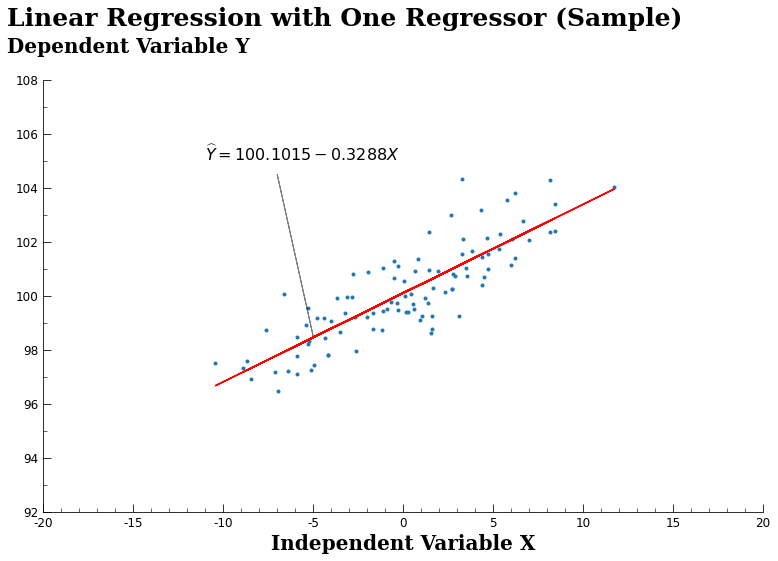

In [231]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

beta_0 = np.round(sample_results.params[0], 4)
beta_1 = np.round(sample_results.params[1], 4)

x = sample_x[:,1]
y = sample_y

ax.scatter(x, y, marker=".")
ax.plot(x, beta_0 + beta_1*x, color="red")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(92, 108)
ax.set_xlim(-20, 20)

ax.set_xlabel("Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")
ax.text(-22,109,'Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax.text(-22,110,'Linear Regression with One Regressor (Sample)', fontfamily='serif', fontsize=25, ma='center', fontweight='bold')

ax.arrow(-5, 98.5, -2, 6, alpha=0.5)
ax.text(-11, 105, r'$\widehat{Y}=%s-%sX$'%(beta_0, beta_1), fontsize=16)

plt.show()